
# Project: Investigate a Dataset - [TMDb_movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, a data set contains movies' information is analyzed. Based on the provided data, several questions for analysis is proposed. We cleaned the data and then conduct EDA (Expoloratory Data Analysis) to seek answers to the proposed questions. Conclusions are finally obtained based on the data analysis.

### Dataset Description 

> The data set that we investigated is collected from The Movie Database (TMDb)，and it contains information about 10,000 movies released from 1960 to 2015, including the budget, revenue, cast, and ratings. This data set is valuable for people to have a better understanding of movies' quality and movie industry. 


### Question(s) for Analysis
> I proposed the following questions, and these questions would be answered in the later part of this file.

> #### Questions for One Variable
> 1. What is the average run time of movies in the data set?
> 2. What are the largest and lowest profit of all the movies?

> #### Questions for Several Variables
> 3. For the most profitable movie, in which year were it released?
> 4. Taking inflation over time into account, which movie has the highest revenue?
> 5. Who is/are the director(s) that produced the most highly-rated movies?
> 6. What are the top genres with respect to profitable movies?
> 7. What is the relation between movie's revenue and rating? Are they positive correlated?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data set is loaded, checked for cleanliness, and then trimmed and cleaned for analysis. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
The following points are my ovservation of places that needs to be cleaned. The data cleaning process is based on my observastion, and is conducted following the sequence of my observation.

> #### 1. Remove Irrelevant Columns
There are columns that are irrelevant to my questions, including "id", "imdb_id", "popularity", "cast", "homepage", "tagline", "keywords", "overview" and "production_companies". We need to remove these columns.

> #### 2. Check and Remove Duplicated Rows
There might be duplicated rows, we need to check and remove duplicated rows.

> #### 3. Remove or Replace "0"s
> a) There are movies in the database that has zero budget and/or revenue. To analyze the data and answer the proposed questions, we need to disregard such information.

> b) There might be "0"(s) in the runtime column, we need to check and process the "0"s.

> #### 4. Change Data Types
> 1. The formate of budget and revenue column (data type: int) is inconsistent with the format of adjusted budget and revenue column (data type: float), we need to change the format of "budget" and "revenue" column.

> 2. We need to change the "release date" column to date format.

> #### 5. Fill-in Missing Information
> For the "director" colomn, there are places that lack of information, we need to fill the missing information.

#### 1. Remove Irrelevant Columns

There are columns that are irrelevant to my questions, including "id", "imdb_id", "popularity", "cast", "homepage", "tagline", "keywords", "overview" and "production_companies". We need to remove these columns.

In [130]:
# Create a lisit of columns that needs to be removed
remove_list=['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview','production_companies']
# Remove the irrelevant columns
movie_df=movie_df.drop(remove_list,axis=1)
# Check the new dataset
movie_df.head()

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 2. Check and Remove Duplicated Rows

There might be duplicated rows, we need to check and remove duplicated rows.

In [131]:
# Check the number of rows for the data frame
movie_df.shape[0]

10866

In [132]:
# Remove the duplicated rows if there is any
movie_df.drop_duplicates(keep ='first', inplace=True)
# Check the number of rows and columns for the data frame again
# If the number of rows changed, it means that we do had duplicated rows and we have already removed the duplicated
movie_df.shape[0]

10865

So, there is 1 duplicated row and we have removed it.

#### 3. Remove or Replace "0"s

a) There are movies in the database that has zero budget and/or revenue. To analyze the data and answer the proposed questions, we need to disregard such information.

In [133]:
# Create a list of columns that needs to be removed for zero budget and revenue
column_list=['budget','revenue']
# Remove the rows that contains 0 in "budget" and "revenue" columns
movie_df = movie_df[(movie_df[column_list] != 0).all(axis=1)]

In [134]:
# Check the number of rows in "budget" and "revenue" columns that still have zero
sum((movie_df[column_list] == 0).all(axis=1))

0

b) There might be "0"(s) in the runtime column, we need to check and process the "0"s.

In [135]:
# Check the number of rows that have "0" in the runtime clomn
sum(movie_df['runtime']==0)

0

So, in the current dataframe, there is no row that has "0" in the runtime clomn, no need to process on "0"

#### 4. Change Data Type

a) The formate of budget and revenue column (data type: int) is inconsistent with the format of adjusted budget and revenue column (data type: float), we need to change the format of "budget" and "revenue" column.

In [136]:
# Check data type at first
movie_df.dtypes

budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [137]:
# Directly use the list which we previously created to change the data type
movie_df[column_list] = movie_df[column_list].astype(float)
# Check data type again
movie_df.dtypes

budget            float64
revenue           float64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

b) We need to change the "release date" column to date format.

In [138]:
# Change the data type
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

In [139]:
# Check data type again
movie_df.dtypes

budget                   float64
revenue                  float64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

#### 5. Fill-in Missing Information

For the "director" colomn, there are places that lack of information, we need to fill the missing information.

In [140]:
# Check if there is any row in "director" column that lacks of information
movie_df['director'].isnull().sum()

1

We found 1 row that lacks of information.

In [143]:
# Fill in the places with "missing"
movie_df['director'] = movie_df['director'].fillna("Missing Info")

In [144]:
# Check again to ensure currently there is no row in "director" column that lacks of information
movie_df['director'].isnull().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, the cleaned data is analyzed and visualized to answer the proposed questions.


### Questions for One variable
> #### Question 1: What is the average run time of movies in the data set?

In [145]:
# Get the mean value of the runtime, the unit should be minute
movie_df['runtime'].mean()

109.22029060716139

> #### Question 2: What are the largest and lowest profit of all the movies?

In [146]:
# Calculate profit at first
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']
# Preview the updated dataframe
movie_df.head()

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


In [147]:
# Use describe funtion to obtain the min and max for the profit
movie_df['profit'].describe()

count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: profit, dtype: float64

> The interesting thing is that we found that there are movies that has negative profit, which means that these movies did not make money.

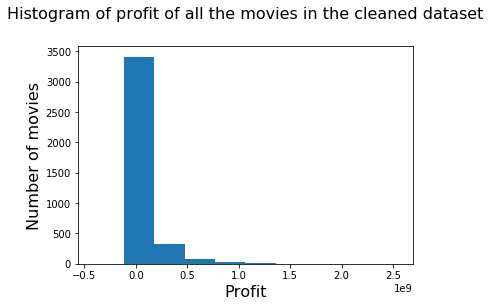

In [181]:
# Another way to see the (approximate) min and max of profit
plt.figure()
# Lable on x axis
plt.xlabel('Profit', fontsize = 16)
# Lable on y axis
plt.ylabel('Number of movies', fontsize=16)
# Figure title
plt.title('Histogram of profit of all the movies in the cleaned dataset', fontsize=16, y=1.1)
# Plot the histogram
plt.hist(movie_df['profit'], rwidth = 1, bins =10)
# Show the plot
plt.show()

> The histogram shows an approximate minimum and maximum of the profit is from 0.5e9 to 2.5e9. The values are close to what we have obtained from using df.describe() function.

> In addition, we may take inflation into account. Here we need to check the profit with inflation.

In [152]:
# Calculate profit with inflation.
movie_df['profit_adj'] = movie_df['revenue_adj'] - movie_df['budget_adj']
# Preview the updated dataframe
movie_df.head()

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,1.254446e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,2.101614e+08
2,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,1.704191e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,1.718723e+09
4,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,1.210949e+09


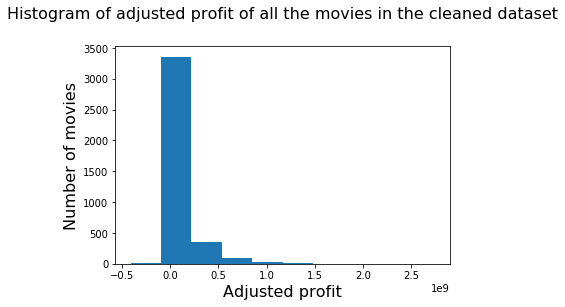

In [179]:
# See the histogram of the adjusted profit to get a sense of the change
plt.figure()
# Lable on x axis
plt.xlabel('Adjusted profit', fontsize = 16)
# Lable on y axis
plt.ylabel('Number of movies', fontsize=16)
# Figure title
plt.title('Histogram of adjusted profit of all the movies in the cleaned dataset', fontsize=16, y=1.1)
# Plot the histogram
plt.hist(movie_df['profit_adj'], rwidth = 1, bins =10)
# Show the plot
plt.show()

The distribution and the min and max value are similar comparing the histogram for original and adjusted profit.

### Questions for Several Variables
> #### Question 3: For the most profitable movie, in which year were it released?
> Taking inflation into account, here we use the adjusted profit.

In [155]:
# Find the maximum for the profit
max_profit = movie_df['profit_adj'].max()
# Find the corresponding row which has the maximum profit
movie_df.loc[movie_df['profit_adj'] == max_profit]

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
1329,11000000.0,775398007.0,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,764398007.0,2.750137e+09


> So, the most profitable movie is Star Wars. It makes sense since so many people have watched and love it! Its release year was 1977.

> #### Question 4: Taking inflation over time into account, which movie has the highest revenue? 

In [156]:
# Here we consider the adjusted revenue
# Find the maximum for the revenue
max_revenue = movie_df['revenue_adj'].max()
# Find the corresponding row which has the maximum revenue
movie_df.loc[movie_df['revenue_adj'] == max_revenue]

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
1386,237000000.0,2.781506e+09,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09,2.586237e+09


> So, the movie that has the highest adjusted revenue is Avatar. It makes sense since so many people have watched it! Althrough it has highest revenue, it does not has the highest profit. This also makes sense since it is a movie requires a lot technique and editing.

> #### Question 5: Who is/are the director(s) that produced the most highly-rated movies?

> We found that some of the movies only have a few votes, then the rating for those movies may not be representative
> So before directly using the data, we need to process the vote information

In [157]:
# Check the description of "vote_count" column
movie_df['vote_count'].describe()

count    3854.000000
mean      527.720291
std       879.956821
min        10.000000
25%        71.000000
50%       204.000000
75%       580.000000
max      9767.000000
Name: vote_count, dtype: float64

> The minimum of "vote_count" is only 10, and there are 25% of the movies that has less than 71 votes. The rating for those movies may not be representative. In this case, we choose 100 as a threshold, and only consider movies that has more than 100 votes.

In [158]:
# Set the threshold and get a new dataframe
vote_df = movie_df.loc[movie_df['vote_count'] > 100]
# Check the description of "vote_count" column in the new dataframe
vote_df['vote_count'].describe()

count    2603.000000
mean      758.845947
std       990.783437
min       101.000000
25%       198.000000
50%       389.000000
75%       852.500000
max      9767.000000
Name: vote_count, dtype: float64

In [159]:
# Find the maximum for the rating
max_rating = vote_df['vote_average'].max()
# Find the corresponding row which has the maximum profit
vote_df.loc[vote_df['vote_average'] == max_rating]

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
4178,25000000.0,28341469.0,The Shawshank Redemption,Frank Darabont,142,Drama|Crime,1994-09-10,5754,8.4,1994,3.677779e+07,4.169346e+07,3341469.0,4.915674e+06


> Based on the information, The Shawshank Redemption is the most highly-rated movies, and its director is Frank Darabont.

> #### Question 6: What are the top genres with respect to profitable movies?

In [160]:
# First of all, we only consider profitable movies. Considering the inflation, we still use adjusted profit.
# Create a new dataframe for profitable movies
profitable_df = movie_df.loc[movie_df['profit_adj'] > 0]
# Check the description of "vote_count" column in the new dataframe
profitable_df['profit_adj'].describe()

count    2.778000e+03
mean     1.354002e+08
std      2.134524e+08
min      9.360334e-01
25%      2.029698e+07
50%      6.140684e+07
75%      1.548580e+08
max      2.750137e+09
Name: profit_adj, dtype: float64

In [161]:
# Define a function that collects all the genres
def GenreName(column):
    # Take a column in the new dataframe, and separate the strings by '|'
    genre = profitable_df[column].str.cat(sep = '|')
    # Remove all the '|' and turn the string into a pandas series
    genre = pd.Series(genre.split('|'))
    return genre

In [162]:
# Check the generated series
GenreName('genres').head()

0             Action
1          Adventure
2    Science Fiction
3           Thriller
4             Action
dtype: object

In [163]:
# Check the top genres for profitable movies
Genre_count = GenreName('genres').value_counts()
Genre_count.head()

Drama        1172
Comedy       1010
Thriller      839
Action        788
Adventure     575
dtype: int64

Text(0.5,1.1,'All the movie genres with the counted frequency for profitable movies')

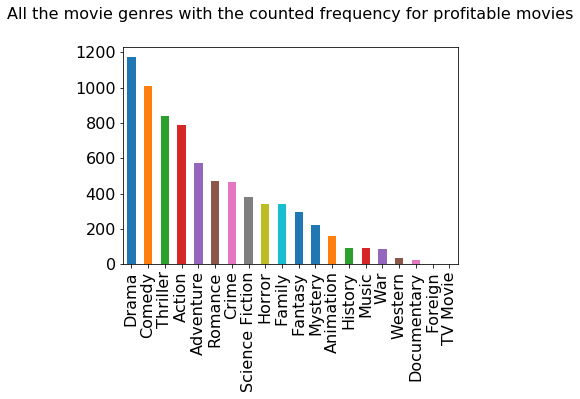

In [178]:
# Plot the genres with the counted frequency
Genre_count.plot.bar(fontsize = 16)
plt.title("All the movie genres with the counted frequency for profitable movies",fontsize = 16,y=1.1)

> Based on the results, the top genres with respect to profitable movies are: drama, comedy, thriller, action and adventrue.

> #### Question 7: What is the relation between movie's revenue and rating? Are they positive correlated?
> Here we still use the adjusted revenue. To ensure the rating is representative, we used the processed dataframe "vote_df" here.

Text(0,0.5,'Adjusted revenue')

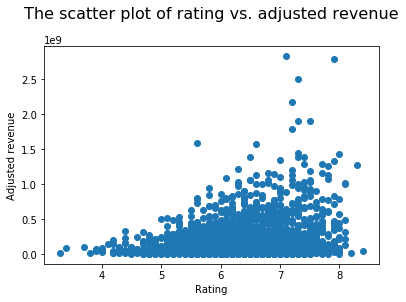

In [176]:
# Set X value
x=vote_df['vote_average']
# Set Y value
y=vote_df['revenue_adj']
# Scatter plot
plt.scatter(x,y)

# Set title
plt.title("The scatter plot of rating vs. adjusted revenue", fontsize = 16, y=1.1)
# Set lables for x and y axis
plt.xlabel("Rating")
plt.ylabel("Adjusted revenue")

> Seen from the result, we found that the higher revenue a movie has, the more possible a higher rating a movie would get. However, a high rating of a movie does not necessarily mean a high revenue.

In [183]:
# Use the corr function to check the correlation between movie's revenue and rating
vote_df['vote_average'].corr(vote_df['revenue_adj'])

0.23118243762425247

> Based on the result, yes, movie's revenue and rating are positive correlated.

<a id='conclusions'></a>
## Conclusions
> In this project, we analyzed a data set collected from The Movie Database (TMDb). The data set contains information of movies that were released from  1960 to 2015. Based on the given information, we proposed several questions. To answer these questions, we cleaned, analyzed and visualized the given data. Through our analysis, some features of movie industry and market could be discovered

> ### Discovered Features
> **1. The average runtime of movie is around 109 minutes.** This result might be led by market's choice. People might not prefer to watch a movie if its running time is too long.

> **2. Regardless of taking inflation into account, more than 25% of the movies are not profitable.** This indicates that a good planning of the movie might be essential.

> **3. Movies that has high revenue or high rating does not mean a high profit.** The budget of a movie and market's interest also have an influence on the profit. For instance, Avatar is the movie with the highest revenue, however, its budget is also high, which influences its final profit. Another example is The Shawshank Redemption, it has the highest rating, while its profit is only 4.915674e+06 USD. This is because that it was release on 1994, the year that both Pulp Fiction and Forret Gampl also released. The market's interest was distracted.

> **4. Movies with high rating, revenue and profit are usually popular movies.** Movies that we found with highest rating, revenue and profit are The Shawshank Redemption, Avatar and Star War. All of these 3 movies are well-known, and they are on many people's movie lists.

> **5. Drama, comedy, thriller, action and adventure are most popular genres of movies.** This result make sense since movies in these genres are more attractive to people, and people are more willing to watch in the theater.


### Limitations
> **1. The data cleaning process are based on the proposed questions.** If the questions are different, the cleaning process should change accordingly. 

> **2. The data analysis process contains threshold from personal observation.** For instance, in the analysis process to anwer question 6, to ensure the ratings are representative, I picked 100 as a threshold, and only movies with more than 100 votes are taken into consideration.

In [4]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0